<a href="https://colab.research.google.com/github/juanjose1919/Proyectos-primer-corte/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3rd Project
Gerardo Antonio Pardo Mora - 
Juan Jose Bohorquez Ramirez -
Valeria Mendez Corredor 

# Importación de librerías y Carga de datos

In [ ]:
!pip install missingno
import pandas as pd
import numpy as np
import missingno as ms
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset_1.csv")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Exploración inicial

In [ ]:
data.head()

,user_id,gender,wage,purchased,birth_day
0,217,Female,NaN,0,1983-08-06
1,226,Female,146500.0,1,1972-01-28
2,697,Male,NaN,1,1981-12-12
3,743,Female,NaN,0,1983-05-26
4,63,Female,140500.0,1,1967-11-02


In [ ]:
data.tail()

,user_id,gender,wage,purchased,birth_day
1169,636,Male,76500.0,0,1970-08-26
1170,320,Female,143500.0,1,1970-04-07
1171,136,Female,NaN,1,1968-12-28
1172,721,Male,148000.0,1,1993-11-23
1173,471,man,60500.0,0,1984-06-02


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    1174 non-null   int64  
 1   gender     1174 non-null   object 
 2   wage       930 non-null    float64
 3   purchased  1174 non-null   int64  
 4   birth_day  1174 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.0+ KB


In [ ]:
data.describe()

,user_id,wage,purchased
count,1174.000000,930.000000,1174.000000
mean,499.988927,71948.387097,0.404600
std,287.648865,34112.616989,0.491024
min,1.000000,15000.000000,0.000000
25%,252.250000,45500.000000,0.000000
50%,499.500000,71250.000000,0.000000
75%,749.750000,89500.000000,1.000000
max,1000.000000,152500.000000,1.000000


In [ ]:
#La variable salario presenta un sesgo positivo ya que la media es mas grande que la mediana

In [ ]:
data.nunique()

user_id      1000
gender          4
wage          234
purchased       2
birth_day     964
dtype: int64

# Revisión de duplicados 


In [ ]:
data.duplicated().sum()

174

In [ ]:
data=data.drop_duplicates().reset_index(drop=True)

In [ ]:
#La base de datos se reduce en 174 

# Transformación de tipos de datos

In [ ]:
data.columns

Index(['user_id', 'gender', 'wage', 'purchased', 'birth_day'], dtype='object')

In [ ]:
data.rename(columns={"user_id":"id"}, inplace=True)

In [ ]:
data["gender"]

0      Female
1      Female
2        Male
3      Female
4      Female
        ...  
995    Female
996      Male
997    Female
998      Male
999       man
Name: gender, Length: 1000, dtype: object

In [ ]:
data.replace({"gender":{"man":"Male","woman":"Female"}},inplace=True)

In [ ]:
data.nunique()

id           1000
gender          2
wage          234
purchased       2
birth_day     964
dtype: int64

In [ ]:
#Inicialmente habían cuatro tipos de datos en la variable genero que pasan a ser dos luego de la transformación de tipos de datos 

# Enriquecimiento del dataset

In [ ]:
data['birth_day']

0      1983-08-06
1      1972-01-28
2      1981-12-12
3      1983-05-26
4      1967-11-02
          ...    
995    1969-03-09
996    1970-08-26
997    1970-04-07
998    1993-11-23
999    1984-06-02
Name: birth_day, Length: 1000, dtype: object

In [ ]:
birth_date = pd.to_datetime(data["birth_day"],format= '%Y-%m-%d')

In [ ]:
hoy=pd.to_datetime("2022-08-31",format= '%Y-%m-%d')

In [ ]:
hoy.year-birth_date.dt.year

0      39
1      50
2      41
3      39
4      55
       ..
995    53
996    52
997    52
998    29
999    38
Name: birth_day, Length: 1000, dtype: int64

In [ ]:
data["edad"]=(pd.Series(hoy, index=birth_date.index) - birth_date).astype('timedelta64[Y]')

In [ ]:
data["edad"]

0      39.0
1      50.0
2      40.0
3      39.0
4      54.0
       ... 
995    53.0
996    52.0
997    52.0
998    28.0
999    38.0
Name: edad, Length: 1000, dtype: float64

In [ ]:
data.tail()

,id,gender,wage,purchased,birth_day,edad
995,305,Female,22500.0,1,1969-03-09,53.0
996,636,Male,76500.0,0,1970-08-26,52.0
997,320,Female,143500.0,1,1970-04-07,52.0
998,721,Male,148000.0,1,1993-11-23,28.0
999,471,Male,60500.0,0,1984-06-02,38.0


In [ ]:
data["edad"]=(data["edad"]).astype("int64")

In [ ]:
data["edad"]

0      39
1      50
2      40
3      39
4      54
       ..
995    53
996    52
997    52
998    28
999    38
Name: edad, Length: 1000, dtype: int64

In [ ]:
#Se crea una nueva columna calculando las edades actuales a partir de las fechas de nacimiento dadas en la base de datos  

# Verificación de missing values y tratamiento

In [ ]:
data.isnull()

,id,gender,wage,purchased,birth_day,edad
0,False,False,True,False,False,False
1,False,False,False,False,False,False
2,False,False,True,False,False,False
3,False,False,True,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
995,False,False,False,False,False,False
996,False,False,False,False,False,False
997,False,False,False,False,False,False
998,False,False,False,False,False,False


In [ ]:
data.isna().sum()

id             0
gender         0
wage         214
purchased      0
birth_day      0
edad           0
dtype: int64

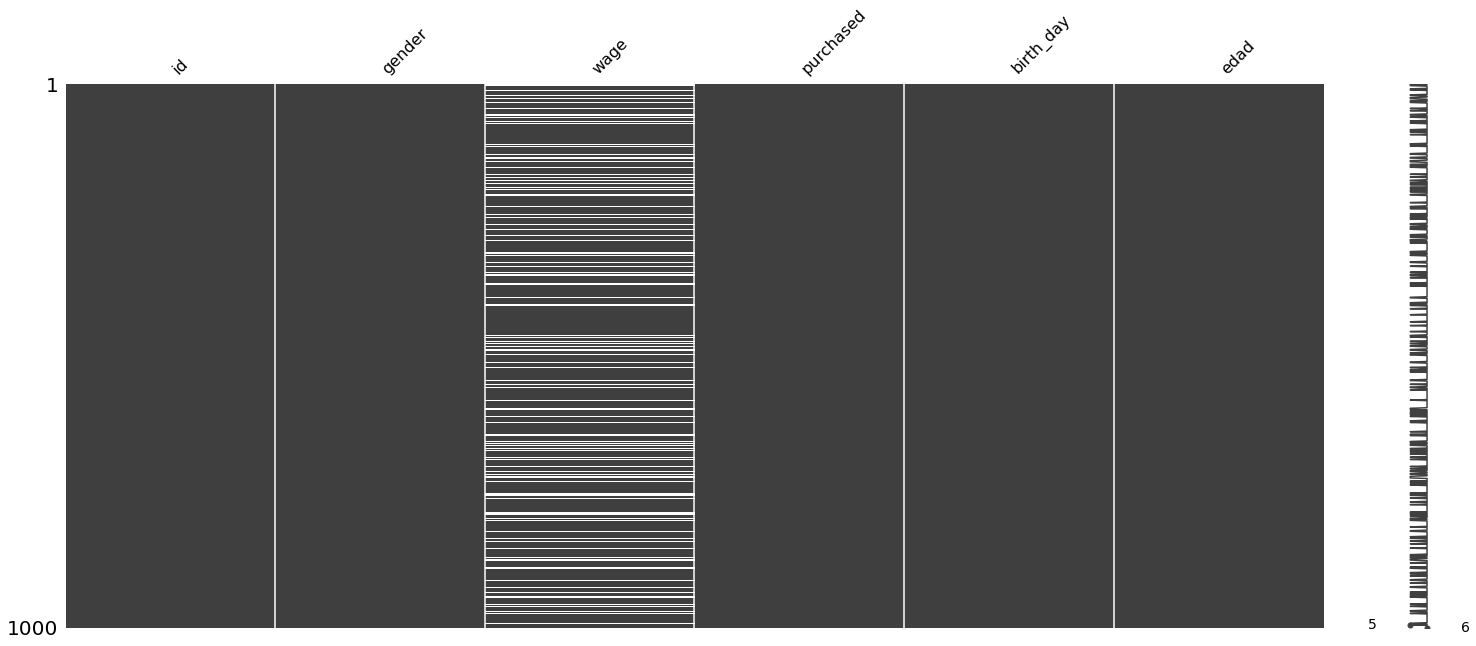

In [ ]:

ms.matrix(data)

In [ ]:
pivot=data.pivot_table(index=["purchased","gender"],values="wage",aggfunc="mean")

In [ ]:
pivot

wage
purchased gender              
0         Female  64287.815126
          Male    61706.521739
1         Female  87595.930233
          Male    85537.671233

In [ ]:
def funcion(row):
  wage=row["wage"]
  gender=row["gender"]
  purchased=row["purchased"]
  if pd.isna(wage):
    return pivot["wage"][purchased][gender]
  return wage

In [ ]:
data.apply(funcion, axis=1)

0       64287.815126
1      146500.000000
2       85537.671233
3       64287.815126
4      140500.000000
           ...      
995     22500.000000
996     76500.000000
997    143500.000000
998    148000.000000
999     60500.000000
Length: 1000, dtype: float64

In [ ]:
data["wage"]=data.apply(funcion, axis=1)

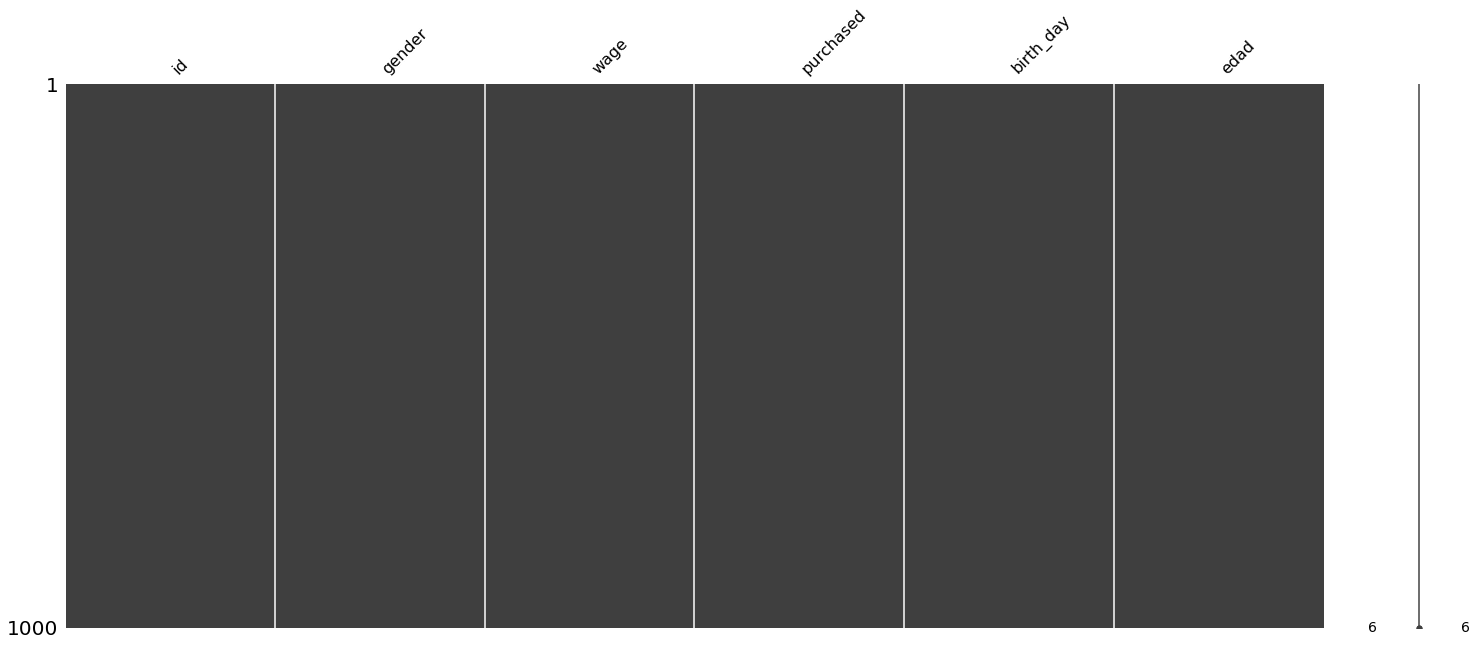

In [ ]:
ms.matrix(data)

In [ ]:
#Solo se presentaban datos faltantes en la variable salario por lo cual se puede entender que las personas de las cuales se tomó la base de datos
# tienden a ser más privados con la información respecto a sus ingresos 

# Outliers

In [ ]:
wagef=data['wage']

In [ ]:
q1=wagef.quantile(0.25)

In [ ]:
q1

53500.0

In [ ]:
q3=wagef.quantile(0.75)

In [ ]:
rq=q3-q1 #rango intercuartilico

In [ ]:
lims=(1.5*rq)+q3 #limite superior

In [ ]:
limi=q1-1.5*rq 

In [ ]:
w=wagef[(wagef>lims)].index

In [ ]:
w

Int64Index([  1,   4,  15,  70,  80,  98, 130, 149, 212, 251, 252, 261, 274,
            345, 347, 360, 415, 513, 517, 518, 546, 587, 589, 599, 643, 666,
            687, 691, 693, 738, 778, 824, 829, 864, 886, 893, 895, 905, 908,
            948, 950, 997, 998],
           dtype='int64')

In [ ]:
wagef2=wagef[~wagef.index.isin(w)] 

In [ ]:
wagef2.describe()

count       957.000000
mean      69216.288803
std       27209.955061
min       15000.000000
25%       52500.000000
50%       64500.000000
75%       85537.671233
max      138500.000000
Name: wage, dtype: float64

In [ ]:
wagef2.mean() - wagef2.median()

4716.288802517185

In [ ]:
liminf=max(wagef.min(),limi) #limite inferior

In [ ]:
w2=wagef2[(wagef2<liminf)].index

In [ ]:
w2

Int64Index([], dtype='int64')

In [ ]:
wagef2=wagef2[~wagef2.index.isin(w2)]

In [ ]:
wagef2.describe()

count       957.000000
mean      69216.288803
std       27209.955061
min       15000.000000
25%       52500.000000
50%       64500.000000
75%       85537.671233
max      138500.000000
Name: wage, dtype: float64

In [ ]:
out=wagef2[wagef2<min([liminf])]

In [ ]:
out

Series([], Name: wage, dtype: float64)

In [ ]:
data_d=data

In [ ]:
data_d=data_d.dropna().reset_index(drop=True)

In [ ]:
data_d.describe() #Es la base de datos luego de eliminar los outliers

,id,wage,purchased,edad
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,72518.488384,0.402000,39.734000
std,288.819436,30853.955775,0.490547,10.722603
min,1.000000,15000.000000,0.000000,17.000000
25%,250.750000,53500.000000,0.000000,32.000000
50%,500.500000,67500.000000,0.000000,39.000000
75%,750.250000,87595.930233,1.000000,48.000000
max,1000.000000,152500.000000,1.000000,63.000000


# Datos inconsistentes

In [ ]:
data.describe()

,id,wage,purchased,edad
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,72518.488384,0.402000,39.734000
std,288.819436,30853.955775,0.490547,10.722603
min,1.000000,15000.000000,0.000000,17.000000
25%,250.750000,53500.000000,0.000000,32.000000
50%,500.500000,67500.000000,0.000000,39.000000
75%,750.250000,87595.930233,1.000000,48.000000
max,1000.000000,152500.000000,1.000000,63.000000


In [ ]:
data[(data['edad']<18)]

,id,gender,wage,purchased,birth_day,edad
420,717,Male,82000.0,0,2004-11-11,17
569,632,Female,86000.0,0,2004-09-15,17


In [ ]:
data[(data['wage']>67500.000000)&(data['edad']<20)]

,id,gender,wage,purchased,birth_day,edad
187,300,Female,68000.0,0,2004-02-28,18
268,617,Male,76000.0,0,2003-02-22,19
269,77,Male,70000.0,0,2003-12-27,18
385,868,Female,87500.0,0,2003-06-02,19
420,717,Male,82000.0,0,2004-11-11,17
487,345,Female,82000.0,0,2002-10-27,19
520,3,Male,74000.0,0,2002-12-09,19
569,632,Female,86000.0,0,2004-09-15,17
578,39,Male,83500.0,0,2003-03-12,19
725,87,Male,85000.0,0,2003-11-20,18


In [ ]:
data[(data['wage']>67500.000000)&(data['edad']>60)]

,id,gender,wage,purchased,birth_day,edad
55,440,Male,85500.000000,1,1959-10-20,62
226,880,Male,85537.671233,1,1959-07-15,63
286,431,Male,85537.671233,1,1959-03-01,63
366,323,Male,85537.671233,1,1961-05-05,61
518,647,Male,145500.000000,1,1960-06-22,62
637,535,Male,104500.000000,1,1959-10-10,62
737,412,Female,87595.930233,1,1961-04-18,61
756,18,Male,85537.671233,1,1959-06-19,63
792,805,Male,132500.000000,1,1960-11-05,61
849,456,Female,103500.000000,1,1961-05-24,61


In [ ]:
data[(data['wage']<67500.000000)&(data['edad']<20)]

,id,gender,wage,purchased,birth_day,edad
275,36,Male,26500.000000,0,2002-09-19,19
317,207,Male,53500.000000,0,2003-11-29,18
408,666,Female,45500.000000,0,2003-09-02,18
413,174,Male,61706.521739,0,2003-07-30,19
626,713,Female,21000.000000,0,2003-02-07,19
711,976,Female,64287.815126,0,2003-04-15,19
754,511,Female,64287.815126,0,2004-01-05,18
770,563,Female,23000.000000,0,2002-12-17,19
787,156,Male,61706.521739,0,2003-02-01,19
866,580,Male,52000.000000,0,2004-04-05,18


In [ ]:
data[(data['wage']<67500.000000)&(data['edad']>60)]

,id,gender,wage,purchased,birth_day,edad
8,753,Female,49500.0,1,1961-08-06,61
131,720,Female,25500.0,1,1961-01-23,61
219,443,Female,48500.0,1,1959-02-05,63
310,615,Male,35500.0,1,1961-06-25,61
694,628,Female,44500.0,0,1960-01-10,62
763,379,Female,31500.0,1,1960-08-08,62


En la base de datos solo se encuentran dos menores de edad, un hombre y una mujer, los cuales ganan por encima del salario promedio.
La cantidad de personas menores a 20 años que tienen un salario por encima de la mediana es similar a aquellos menores de 20 que ganan por debajo de la mediana, aun así, ninguno de estos realizó la compra.
Por el otro lado la cantidad de personas mayores a 60 que poseen un salario por encima de la mediana es mayor a la de aquellos en dicho rango de edad que ganan por debajo de la mediana.
De las seis personas mayores de 60 años que tienen un salario por debajo de la mediana resalta la existencia de una sola persona que no hizo la compra, y también la de un solo hombre.  

# Manejo de memoria

In [ ]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1000 non-null   int64  
 1   gender     1000 non-null   object 
 2   wage       1000 non-null   float64
 3   purchased  1000 non-null   int64  
 4   birth_day  1000 non-null   object 
 5   edad       1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 157.4 KB


In [ ]:
data["id"]=(data["id"]).astype("int8")
data["purchased"]=(data["purchased"]).astype("int8")
data["edad"]=(data["edad"]).astype("int8")

In [ ]:
c = data.select_dtypes('object').columns
for col in c:
  data[c] = data[c].astype('category')

In [ ]:
#Las variables category ocupan menos espacio de memoria que las object, al igual que las int8 ocupan menos espacio que las int64

# Clasificación de datos:

In [ ]:
#Grupos por edad 
data.groupby("edad")

In [ ]:
list(data.groupby("edad"))

[(17,       id  gender     wage  purchased   birth_day  edad
  420  -51    Male  82000.0          0  2004-11-11    17
  569  120  Female  86000.0          0  2004-09-15    17),
 (18,       id  gender          wage  purchased   birth_day  edad
  187   44  Female  68000.000000          0  2004-02-28    18
  269   77    Male  70000.000000          0  2003-12-27    18
  317  -49    Male  53500.000000          0  2003-11-29    18
  408 -102  Female  45500.000000          0  2003-09-02    18
  725   87    Male  85000.000000          0  2003-11-20    18
  754   -1  Female  64287.815126          0  2004-01-05    18
  866   68    Male  52000.000000          0  2004-04-05    18),
 (19,       id  gender          wage  purchased   birth_day  edad
  268  105    Male  76000.000000          0  2003-02-22    19
  275   36    Male  26500.000000          0  2002-09-19    19
  385  100  Female  87500.000000          0  2003-06-02    19
  413  -82    Male  61706.521739          0  2003-07-30    19
  487  

In [ ]:
data.groupby(["edad"]).agg({"edad":["mean","median","min","max","count"]})

edad                     
      mean median min max count
edad                           
17    17.0   17.0  17  17     2
18    18.0   18.0  18  18     7
19    19.0   19.0  19  19    14
20    20.0   20.0  20  20    12
21    21.0   21.0  21  21     9
22    22.0   22.0  22  22    11
23    23.0   23.0  23  23    11
24    24.0   24.0  24  24    16
25    25.0   25.0  25  25    19
26    26.0   26.0  26  26    26
27    27.0   27.0  27  27    27
28    28.0   28.0  28  28    25
29    29.0   29.0  29  29    14
30    30.0   30.0  30  30    24
31    31.0   31.0  31  31    25
32    32.0   32.0  32  32    17
33    33.0   33.0  33  33    17
34    34.0   34.0  34  34    19
35    35.0   35.0  35  35    51
36    36.0   36.0  36  36    37
37    37.0   37.0  37  37    33
38    38.0   38.0  38  38    44
39    39.0   39.0  39  39    43
40    40.0   40.0  40  40    49
41    41.0   41.0  41  41    36
42    42.0   42.0  42  42    40
43    43.0   43.0  43  43    29
44    44.0   44.0  44  44    14
45    45.0   45.0  45  45    23
46    46.0   46.0  46  46    24
47    47.0   47.0  47  47    30
48    48.0   48.0  48  48    33
49    49.0   49.0  49  49    32
50    50.0   50.0  50  50    24
51    51.0   51.0  51  51    12
52    52.0   52.0  52  52    21
53    53.0   53.0  53  53    10
54    54.0   54.0  54  54    13
55    55.0   55.0  55  55    14
56    56.0   56.0  56  56    10
57    57.0   57.0  57  57    12
58    58.0   58.0  58  58    13
59    59.0   59.0  59  59    21
60    60.0   60.0  60  60    16
61    61.0   61.0  61  61     9
62    62.0   62.0  62  62     7
63    63.0   63.0  63  63     5

In [ ]:
#Clasificación por grupos etarios
data["edad_"]= pd.cut(data["edad"],5)

In [ ]:
#Grupos por ingreso
data.groupby("wage")

In [ ]:
list(data.groupby("wage"))

[(15000.0,       id  gender     wage  purchased   birth_day  edad         edad_
  414 -112    Male  15000.0          0  1992-04-10    30  (26.2, 35.4]
  817   26  Female  15000.0          0  1991-02-11    31  (26.2, 35.4]),
 (16000.0,      id gender     wage  purchased   birth_day  edad           edad_
  944 -31   Male  16000.0          0  1996-02-17    26  (16.954, 26.2]),
 (16500.0,
        id  gender     wage  purchased   birth_day  edad           edad_
  28   -80    Male  16500.0          0  1995-09-04    26  (16.954, 26.2]
  75   -83  Female  16500.0          0  1995-10-17    26  (16.954, 26.2]
  156  113  Female  16500.0          0  1990-12-14    31    (26.2, 35.4]),
 (17000.0,
        id  gender     wage  purchased   birth_day  edad           edad_
  464   45    Male  17000.0          0  1992-04-01    30    (26.2, 35.4]
  630  123  Female  17000.0          0  1995-11-14    26  (16.954, 26.2]
  907  -23  Female  17000.0          0  1996-04-17    26  (16.954, 26.2]),
 (17500.0,
  

In [ ]:
data.groupby(["wage"]).agg({"wage":["mean","median","min","max","count"]})

wage                                    
              mean    median       min       max count
wage                                                  
15000.0    15000.0   15000.0   15000.0   15000.0     2
16000.0    16000.0   16000.0   16000.0   16000.0     1
16500.0    16500.0   16500.0   16500.0   16500.0     3
17000.0    17000.0   17000.0   17000.0   17000.0     3
17500.0    17500.0   17500.0   17500.0   17500.0     2
...            ...       ...       ...       ...   ...
149500.0  149500.0  149500.0  149500.0  149500.0     2
150000.0  150000.0  150000.0  150000.0  150000.0     2
150500.0  150500.0  150500.0  150500.0  150500.0     2
151500.0  151500.0  151500.0  151500.0  151500.0     3
152500.0  152500.0  152500.0  152500.0  152500.0     1

[238 rows x 5 columns]

In [ ]:
#Clasificación por grupos de ingreso 
data["wage_"]= pd.cut(data["wage"],3)

#  Tablas pivot

In [ ]:
data["unos"]=1

In [ ]:
#Compras por grupos etarios
comprasedad=data.pivot_table(index=["edad_"],
                  columns=["purchased"],
                  values=["unos"],
                  aggfunc=["sum"])

In [ ]:
comprasedad

sum     
               unos     
purchased         0    1
edad_                   
(16.954, 26.2]  126    1
(26.2, 35.4]    186   33
(35.4, 44.6]    231   94
(44.6, 53.8]     49  160
(53.8, 63.0]      6  114

In [ ]:
comprasedad.columns

MultiIndex([('sum', 'unos', 0),
            ('sum', 'unos', 1)],
           names=[None, None, 'purchased'])

In [ ]:
comprasedad["suma"]= comprasedad['sum', 'unos', 0] + comprasedad['sum', 'unos', 1]
comprasedad["porcentaje compra"]=comprasedad['sum', 'unos', 1]/comprasedad["suma"]*100
comprasedad["porcentaje no compra"]=comprasedad['sum', 'unos', 0]/comprasedad["suma"]*100

In [ ]:
comprasedad #quienes presentan unmayor porcentaje de compra son aquellos en el mayor rango de edad

sum      suma porcentaje compra porcentaje no compra
               unos                                                 
purchased         0    1                                            
edad_                                                               
(16.954, 26.2]  126    1  127          0.787402            99.212598
(26.2, 35.4]    186   33  219         15.068493            84.931507
(35.4, 44.6]    231   94  325         28.923077            71.076923
(44.6, 53.8]     49  160  209         76.555024            23.444976
(53.8, 63.0]      6  114  120         95.000000             5.000000

In [ ]:
#Compras por grupos de ingreso
compraswage=data.pivot_table(index=["wage_"],
                 columns=["purchased"],
                  values=["unos"],
                  aggfunc=["sum"])
compraswage["suma"]=compraswage['sum', 'unos', 1]+compraswage['sum', 'unos', 0]
compraswage["porcentaje compra"]=compraswage['sum', 'unos', 1]/compraswage["suma"]*100
compraswage["porcentaje no compra"]=compraswage['sum', 'unos', 0]/compraswage["suma"]*100

In [ ]:
compraswage #Para los salarios quienes presentan mayor porcentaje de compra son los que se situan en el mayor rango 

sum      suma porcentaje compra porcentaje no compra
                        unos                                                 
purchased                  0    1                                            
wage_                                                                        
(14862.5, 60833.333]     214  103  317         32.492114            67.507886
(60833.333, 106666.667]  362  181  543         33.333333            66.666667
(106666.667, 152500.0]    22  118  140         84.285714            15.714286

In [ ]:
#Compras por género
comprasgenero=data.pivot_table(index=["gender"],
                  columns=["purchased"],
                  values=["unos"],
                  aggfunc=["sum"])
comprasgenero["suma"]=comprasgenero['sum', 'unos', 1]+comprasgenero['sum', 'unos', 0]
comprasgenero["porcentaje compra"]=comprasgenero['sum', 'unos', 1]/comprasgenero["suma"]*100
comprasgenero["porcentaje no compra"]=comprasgenero['sum', 'unos', 0]/comprasgenero["suma"]*100

In [ ]:
comprasgenero # Las mujeres presentan un mayor porcentaje de compra 

sum      suma porcentaje compra porcentaje no compra
          unos                                                 
purchased    0    1                                            
gender                                                         
Female     301  221  522         42.337165            57.662835
Male       297  181  478         37.866109            62.133891

In [ ]:
#Compras por grupos etarios, grupos de ingreso y género
comprasgrupos=data.pivot_table(index=["wage_","edad_","gender"],
                 columns=["purchased"],
                  values=["unos"],
                  aggfunc=["sum"])
comprasgrupos["suma"]=comprasgrupos['sum', 'unos', 1]+comprasgrupos['sum', 'unos', 0]
comprasgrupos["porcentaje compra"]=comprasgrupos['sum', 'unos', 1]/comprasgrupos["suma"]*100
comprasgrupos["porcentaje no compra"]=comprasgrupos['sum', 'unos', 0]/comprasgrupos["suma"]*100

In [ ]:
comprasgrupos #Para todos los grupos de salarios de la base de datos el mayor porcentaje de compra se situa en los hombres y mujeres de mayor edad 

sum     suma porcentaje compra  \
                                              unos                              
purchased                                        0   1                          
wage_                   edad_          gender                                   
(14862.5, 60833.333]    (16.954, 26.2] Female   28   0   28          0.000000   
                                       Male     23   0   23          0.000000   
                        (26.2, 35.4]   Female   39   0   39          0.000000   
                                       Male     41   0   41          0.000000   
                        (35.4, 44.6]   Female   27   1   28          3.571429   
                                       Male     40   1   41          2.439024   
                        (44.6, 53.8]   Female   11  38   49         77.551020   
                                       Male      3  29   32         90.625000   
                        (53.8, 63.0]   Female    2  23   25         92.000000   
                                       Male      0  11   11        100.000000   
(60833.333, 106666.667] (16.954, 26.2] Female   30   1   31          3.225806   
                                       Male     43   0   43          0.000000   
                        (26.2, 35.4]   Female   49   6   55         10.909091   
                                       Male     50   8   58         13.793103   
                        (35.4, 44.6]   Female   81  23  104         22.115385   
                                       Male     79  30  109         27.522936   
                        (44.6, 53.8]   Female   13  26   39         66.666667   
                                       Male     14  31   45         68.888889   
                        (53.8, 63.0]   Female    3  31   34         91.176471   
                                       Male      0  25   25        100.000000   
(106666.667, 152500.0]  (16.954, 26.2] Female    2   0    2          0.000000   
                                       Male      0   0    0               NaN   
                        (26.2, 35.4]   Female    5  10   15         66.666667   
                                       Male      2   9   11         81.818182   
                        (35.4, 44.6]   Female    4  18   22         81.818182   
                                       Male      0  21   21        100.000000   
                        (44.6, 53.8]   Female    6  30   36         83.333333   
                                       Male      2   6    8         75.000000   
                        (53.8, 63.0]   Female    1  14   15         93.333333   
                                       Male      0  10   10        100.000000   

                                              porcentaje no compra  
                                                                    
purchased                                                           
wage_                   edad_          gender                       
(14862.5, 60833.333]    (16.954, 26.2] Female           100.000000  
                                       Male             100.000000  
                        (26.2, 35.4]   Female           100.000000  
                                       Male             100.000000  
                        (35.4, 44.6]   Female            96.428571  
                                       Male              97.560976  
                        (44.6, 53.8]   Female            22.448980  
                                       Male               9.375000  
                        (53.8, 63.0]   Female             8.000000  
                                       Male               0.000000  
(60833.333, 106666.667] (16.954, 26.2] Female            96.774194  
                                       Male             100.000000  
                        (26.2, 35.4]   Female            89.090909  
                                       Male              86.206897  
                        (35.4, 44.6]   Female     

In [ ]:
#Ingreso medio y mediano por grupos etarios
data.pivot_table(index=["edad_"],
                  values=["wage"],
                  aggfunc=["mean","median"])

,mean,median
,wage,wage
edad_,,
"(16.954, 26.2]",57739.834551,61706.521739
"(26.2, 35.4]",69229.010572,64287.815126
"(35.4, 44.6]",75922.701518,71000.000000
"(44.6, 53.8]",74913.650075,80500.000000
"(53.8, 63.0]",80771.210183,85537.671233


In [ ]:
#Ingreso medio y mediano por género
data.pivot_table(index=["gender"],
                  values=["wage"],
                  aggfunc=["mean","median"])

,mean,median
,wage,wage
gender,,
Female,74155.810219,69500.0
Male,70730.450732,66500.0


Las personas de mayores edades y con mayores salarios fueron quienes en promedio hicieron la compra en mayor medida,se puede entender que el producto no era del interes de los jovenes ya que incluso aquellos con altos salarios decidieron no comprar. 
En este caso se evidencia que tanto el ingreso medio como el mediano es mayor para las mujeres, y también es mayor para las edades de de 53 en adelante. 